In [29]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

Necessary Imports

In [30]:
loan_data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

Imported the data file

In [31]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


checked if the file was added up correctly

In [32]:
pd.isna(loan_data).sum()
loan_data = loan_data.dropna()
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


dropped all null values in the table

In [33]:
#scatter_matrix(loan_data)

created a scatter matrix for exploritory data analysis

<Axes: xlabel='Education', ylabel='Loan_Status'>

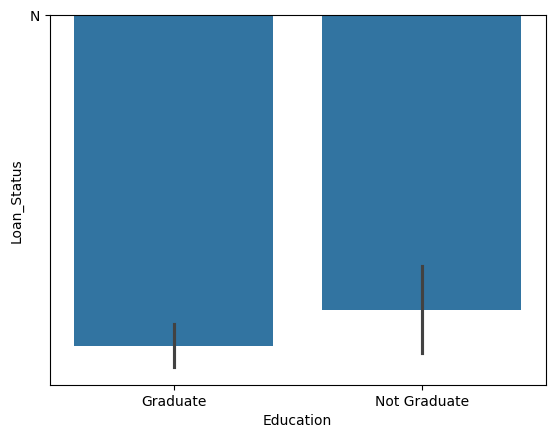

In [34]:
sns.barplot(data=loan_data,x='Education',y='Loan_Status')

<Axes: xlabel='Married', ylabel='Loan_Status'>

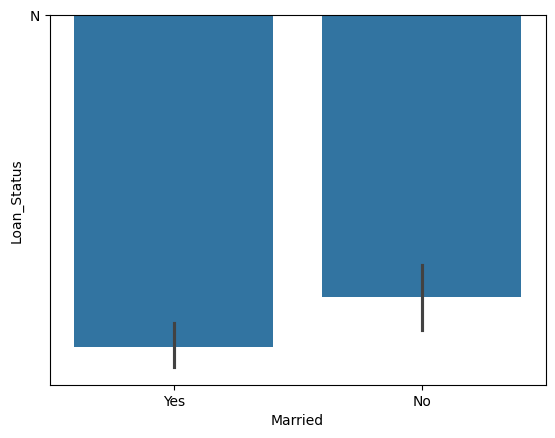

In [35]:
sns.barplot(data=loan_data,x='Married',y='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='Loan_Status'>

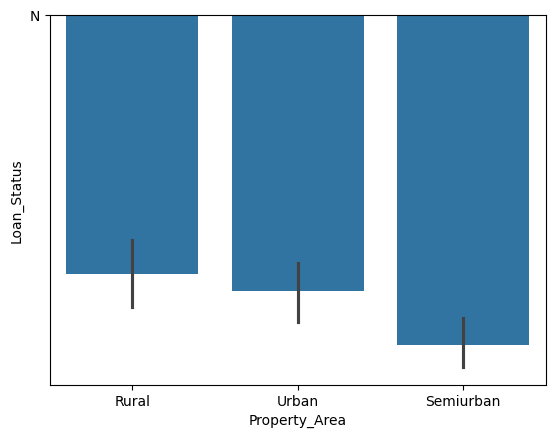

In [36]:
sns.barplot(data=loan_data,x='Property_Area',y='Loan_Status')

did some more exploratory data analysis to see if they are significant

In [37]:
X = pd.DataFrame(loan_data[['Gender','Dependents','Married','Education','Self_Employed','Credit_History','Property_Area']])
Y = pd.DataFrame(loan_data['Loan_Status'])
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.8, random_state=1)
le = LabelEncoder()
for col in X:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])

Then split my data and encoded non numeric data to a numeric code so it can be used in the model

In [38]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
print(acc_decision_tree)

89.58


Created the model and trained it and calculated the accuracy of the model

[Text(0.30833333333333335, 0.95, 'x[5] <= 0.5\ngini = 0.413\nsamples = 96\nvalue = [28, 68]'),
 Text(0.1, 0.85, 'x[2] <= 0.5\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.20416666666666666, 0.8999999999999999, 'True  '),
 Text(0.06666666666666667, 0.75, 'x[0] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.03333333333333333, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1, 0.65, 'x[1] <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.06666666666666667, 0.55, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13333333333333333, 0.75, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.5166666666666667, 0.85, 'x[2] <= 0.5\ngini = 0.314\nsamples = 82\nvalue = [16, 66]'),
 Text(0.41250000000000003, 0.8999999999999999, '  False'),
 Text(0.3, 0.75, 'x[1] <= 1.5\ngini = 0.417\nsamples = 27\nvalue = [8, 19]'),
 Text(0.26666666666666666, 0.65, 'x[0] <= 0.5\ngini = 0.365\nsa

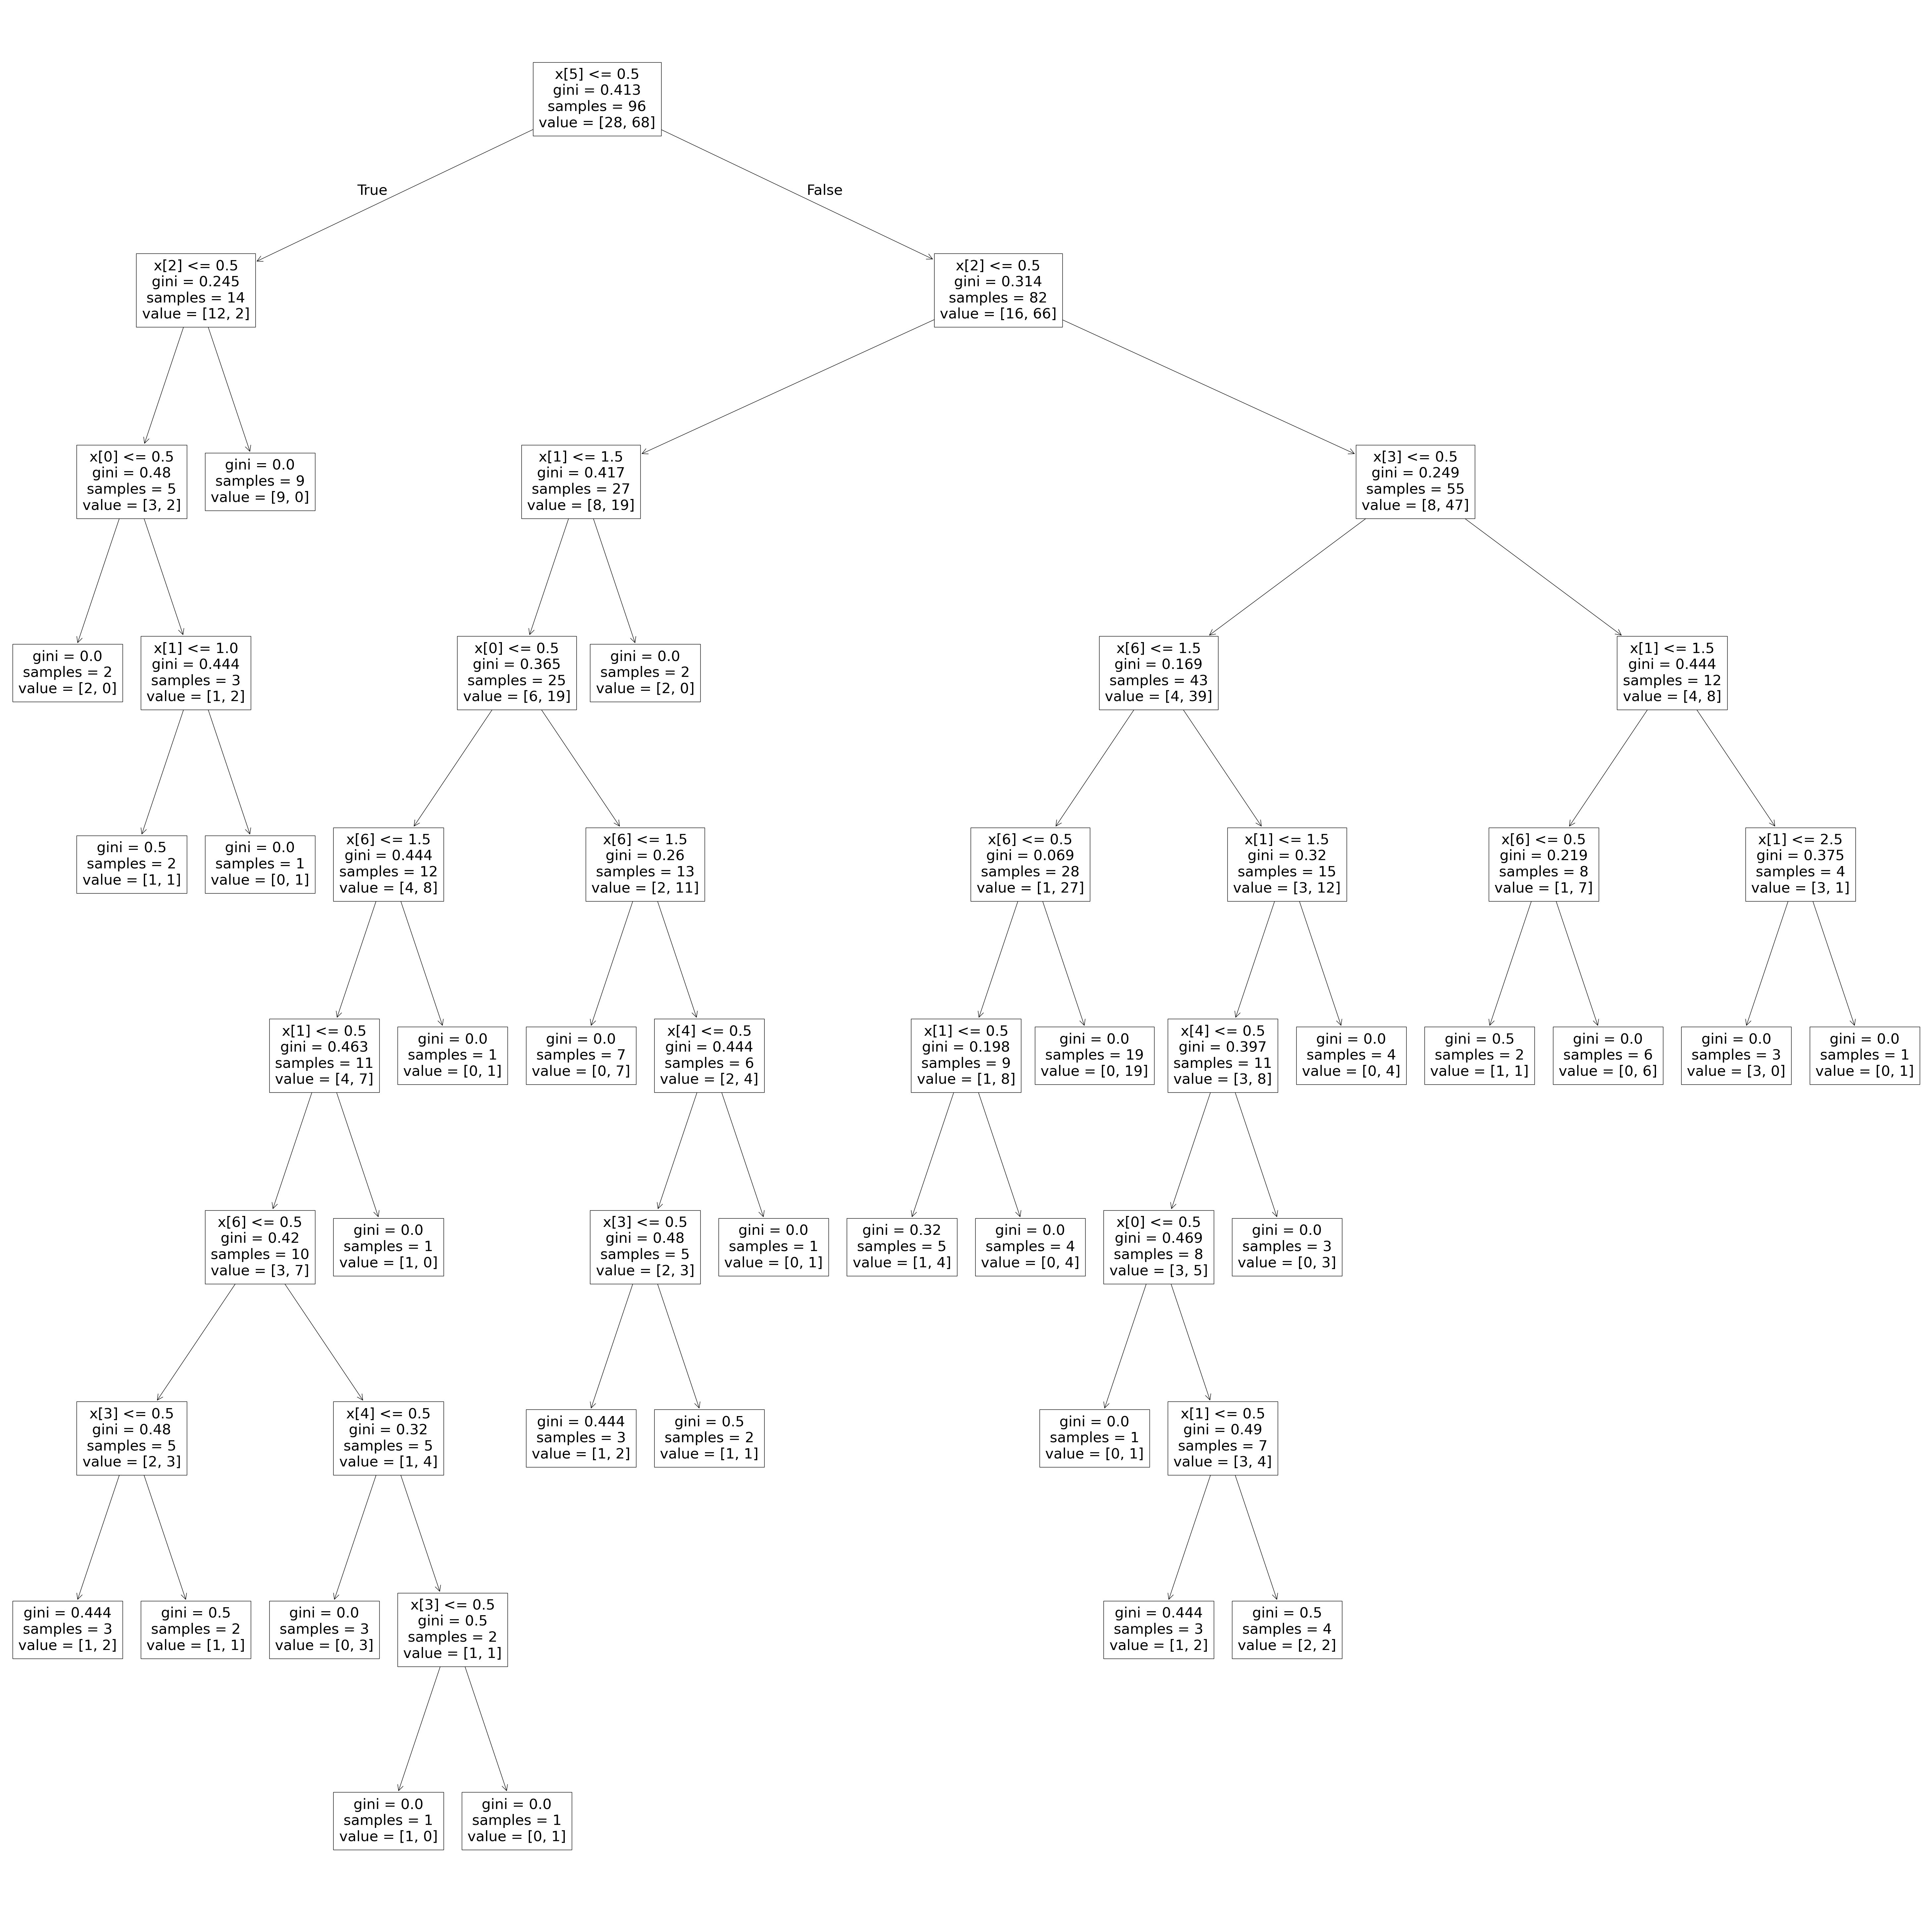

In [39]:
plt.figure(figsize=(75,75))
tree.plot_tree(decision_tree)

printed the decision tree that was created by the model

In [40]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,Y_train)
pred = random_forest.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


created and tested a random forest model which creates multiple decision trees and makes a prediction based on what was the most predicted choice from each of the decision trees while a decsion tree model only uses one decision tree to base a prediction off of

In [41]:
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
print(acc_random_forest)

89.58


calculated the accuracy of my random forest which is the same as my decision tree